In [52]:
import pandas as pd  # Data handling
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
from pyvbmc import VariationalPosterior
from pyvbmc.priors import SplineTrapezoidal
from scipy.optimize import minimize
import scipy.stats as scs
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from pyvbmc import VariationalPosterior

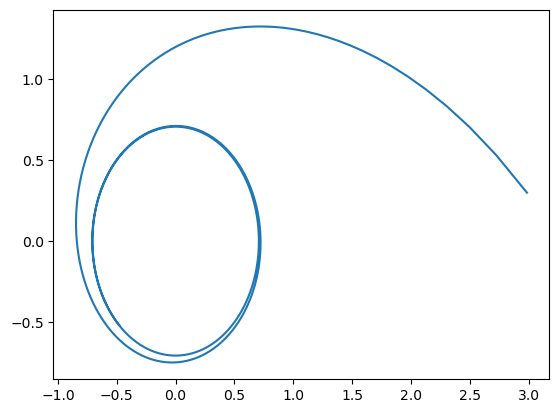

In [115]:
def derivs(t,curr_vals,mu,omega,b):
    r,theta = curr_vals
    rdot = mu * r - r**3
    thetadot = omega + b * r ** 2
    return  rdot, thetadot

# time array for solution
tmax = 10
dt = 0.01
t = np.arange(0,tmax,dt)

mu = 0.5
omega = 1.
b = 1.

initial_condition = [3.0,0.1]

y_true = solve_ivp(derivs,(0,tmax),initial_condition,t_eval = t, args = (mu,omega,b), method = "LSODA").y
# plt.plot(t,sol[0])
# plt.plot(t,sol[1])
# plt.show()

def to_cartesian(sol):
    r = sol[0]
    theta = sol[1]
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y

x,y = to_cartesian(y_true)
plt.plot(x,y)
plt.show()

In [111]:
D = 1  

LB = np.full((1, D), -2.0)  # Lower bounds
UB = np.full((1, D), 2.0)  # Upper bounds

PLB = np.copy(LB)
PUB = np.copy(UB) 
PUB[0][0] =  1.
PLB[0][0] = -1.

x0 = 0.5 * np.ones((1, D))

options = {
    "max_fun_evals": 100,
    "display": "iter"
}

print(options)
print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0_rand:',x0_rand)

def log_likelihood(theta):
    mu = theta[0]
   # print('0')
   # print(mu)
    sol = solve_ivp(derivs,(0,tmax),initial_condition,t_eval = t, args = (mu,omega,b), method = "LSODA").y
   # print("1")
    LL =  np.sum(-(0.5/sigma**2) * (y_true - sol)**2) + np.log(1/(sigma* (2*np.pi)**0.5))
    return LL

sigma = 0.2

{'max_fun_evals': 100, 'display': 'iter'}
LB: [[-2.]] PLB: [[-1.]] PUB: [[1.]] UB: [[2.]] x0: [[0.5]]
LB: [[-2.]] PLB: [[-1.]] PUB: [[1.]] UB: [[2.]] x0_rand: [[0.93405968]]


0.5 0.6904993792294276 <class 'numpy.float64'>


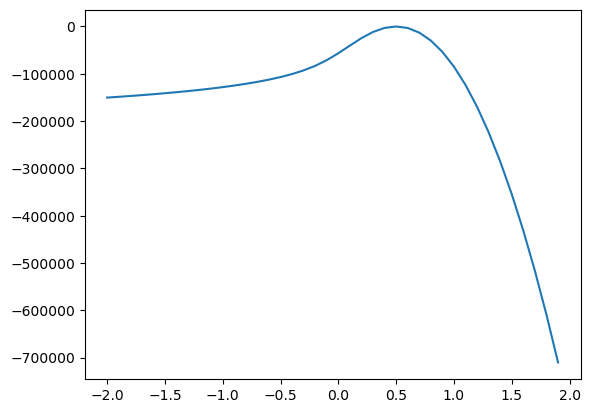

In [112]:
print(mu,log_likelihood([mu]),type(log_likelihood([mu])))

mu_values = np.arange(-2,2, 0.1)

LLs = [log_likelihood([mu_values[i]]) for i in range(len(mu_values))]

plt.plot(mu_values,LLs)

plt.show()

In [104]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = SplineTrapezoidal(LB, PLB, PUB, UB), options = options) # initialize VMBC object

vp, results = vbmc.optimize()

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10          32.07        46.50    187838.77        2        inf     start warm-up
     1         15          -7.55         0.00        38.71        2        inf     
     2         20          -7.53         0.01         0.00        2      0.145     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 2. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 3. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 4. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     3         25          -7.54         0.02         0.00        2      0.149     


c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 1. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 5. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 0. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 6. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


     4         30          -7.54         0.00         0.01        2      0.303     end warm-up
     5         35          -7.54         0.00         0.01        2      0.419     
     6         40          -7.60         0.00         0.07        2       2.61     
     7         45          -7.55         0.00         0.05        3       1.69     
     8         50          -7.54         0.00         0.01        4      0.273     
     9         55          -7.86         0.00         0.37        7       13.3     
    10         60          -7.59         0.00         0.60        7       20.9     
    11         65          -7.66         0.00         0.02        7       0.91     
    12         70          -7.63         0.00         0.08        7       2.83     
    13         75          -7.77         0.00         0.04        7       1.72     
    14         80          -8.12         0.00         0.15        7       6.25     
    15         85          -7.81         0.00         0.34       

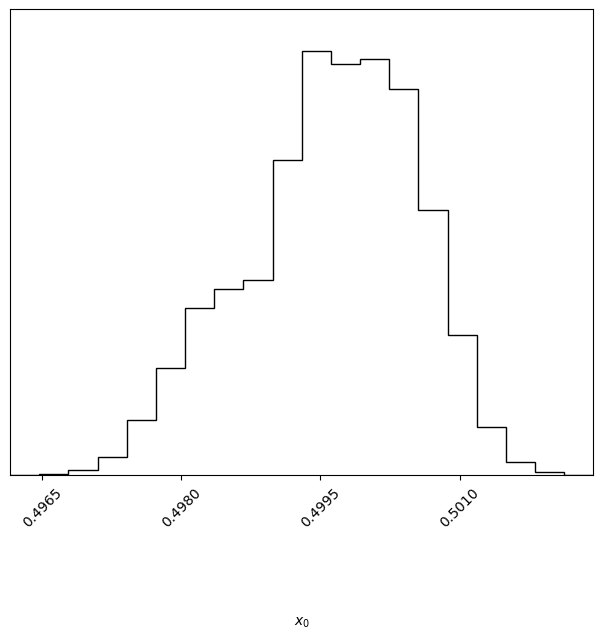

In [105]:
vp.plot();